# Random Forest Regressor with Boston Housing Dataset
This notebook demonstrates how to use a Random Forest algorithm on the Boston Housing dataset. We will cover:
- Loading and exploring the dataset
- Training a Random Forest regressor
- Visualizing feature importance
- Plotting a single decision tree from the forest
- Evaluating model performance

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Explore the Boston Housing Dataset
The Boston Housing dataset contains information about different houses in Boston and their attributes, with the goal of predicting house prices.

Note: The original Boston dataset is deprecated in scikit-learn. We'll use the California Housing dataset as a modern alternative for demonstration.

In [2]:
# Load the dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Split the Data
We split the data into training and testing sets to evaluate the model's performance.

In [3]:
# Split the data
X = df[data.feature_names]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
We train a Random Forest regressor on the training data.

In [4]:
# Train the Random Forest model
rf = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# Feature Importance
Random forests can estimate the importance of each feature in making predictions. Let's visualize the feature importances.

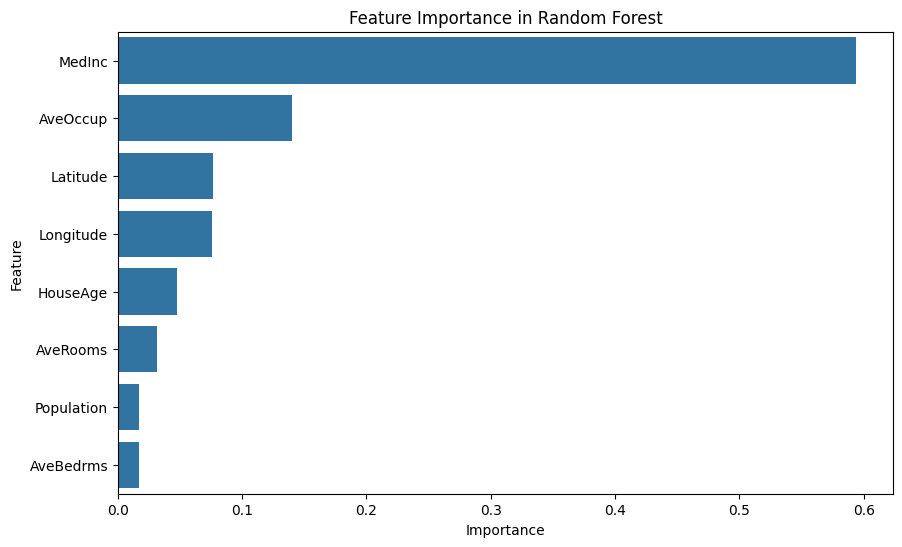

In [5]:
# Feature importance
importances = pd.Series(rf.feature_importances_, index=data.feature_names)
importances = importances.sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index)
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Plot a Single Decision Tree from the Forest
Let's visualize how one of the trees in the random forest makes decisions.

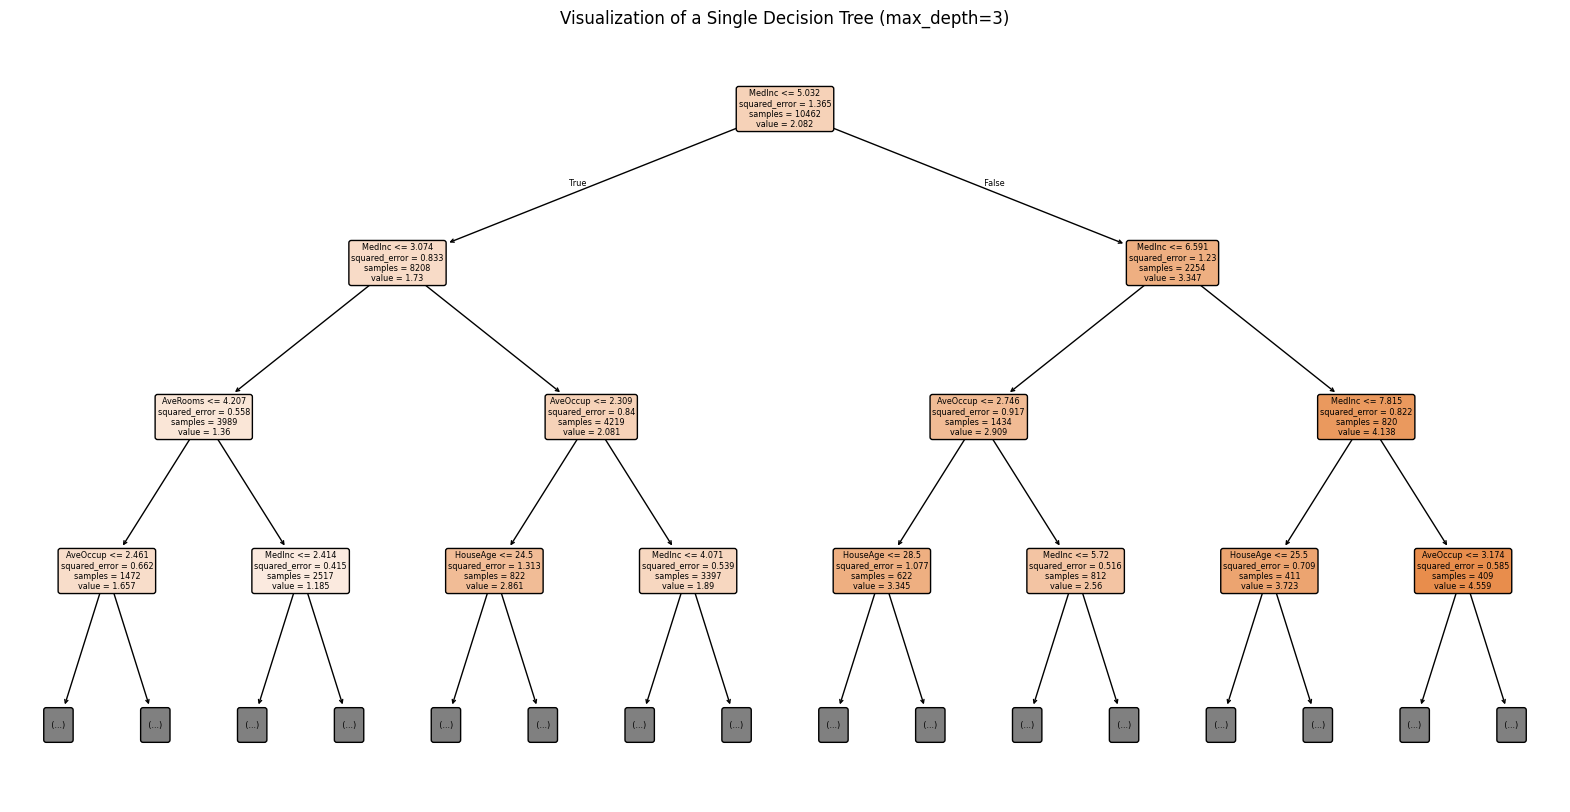

In [6]:
# Plot a single tree from the random forest
estimator = rf.estimators_[0]
plt.figure(figsize=(20,10))
plot_tree(estimator, feature_names=data.feature_names, filled=True, rounded=True, max_depth=3)
plt.title('Visualization of a Single Decision Tree (max_depth=3)')
plt.show()

# Model Evaluation
Evaluate the model's performance on the test set.

In [7]:
# Predict and evaluate
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

Mean Squared Error: 0.29647453265996826
R^2 Score: 0.7737541961457275
